In [0]:
df = spark.read.format("bigquery").option("viewsEnabled","true").option("materializationDataset","spark_materialization").option("materializationProject","wmt-fin-fcp-uat-ds").option("project","wmt-fin-fcp-dev").option("parentProject","wmt-fin-fcp-dev").option('table',str("wmt_us_fcp_trc_pnl.Waggle_POC1")).load()
df.registerTempTable("Waggle_POC")

data=sqlContext.sql("select DISTINCT FISCAL_YR_NBR,FISCAL_QTR_NBR, WM_WK_NBR,COUNT(*) as NUMRECS from Waggle_POC GROUP BY FISCAL_YR_NBR,FISCAL_QTR_NBR,WM_WK_NBR ORDER BY FISCAL_YR_NBR,FISCAL_QTR_NBR,WM_WK_NBR")
# display(data)

##CANADA 
df = spark.read.format("bigquery").option("viewsEnabled","true").option("materializationDataset","spark_materialization").option("materializationProject","wmt-fin-fcp-uat-ds").option("project","wmt-fin-fcp-dev").option("parentProject","wmt-fin-fcp-dev").option('table',str("wmt_us_fcp_trc_pnl.Waggle_CAN_POC1")).load()
df.registerTempTable("Waggle_CAN_POC")

In [0]:
## CANADA
data = data=sqlContext.sql("SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR, DEPT_NBR,CAN_AMT as AMT, PA_NUS_PRVT_PP,PA_NUS_PPPC_RF,PA_NUS_PPP,PA_NUS_ATLS,NY_TTF_GNFS_KN,NY_TRF_NCTR_CN,NY_TRF_NCTR_CD,NY_GSR_NFCY_KN,NY_GSR_NFCY_CN,NY_GSR_NFCY_CD,NY_GNS_ICTR_ZS,NY_GNS_ICTR_GN_ZS,NY_GNS_ICTR_CN,NY_GNS_ICTR_CD,NY_GNP_PCAP_PP_KD,NY_GNP_PCAP_PP_CD,NY_GNP_PCAP_KN,NY_GNP_PCAP_KD_ZG FROM Waggle_CAN_POC WHERE CAN_AMT>0 AND WM_WK_NBR=35")
# data = data=sqlContext.sql("SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR, DEPT_NBR,CAN_AMT as AMT, PA_NUS_PRVT_PP,PA_NUS_PPPC_RF,PA_NUS_PPP,PA_NUS_ATLS,NY_TTF_GNFS_KN,NY_TRF_NCTR_CN,NY_TRF_NCTR_CD,NY_GSR_NFCY_KN,NY_GSR_NFCY_CN,NY_GSR_NFCY_CD,NY_GNS_ICTR_ZS,NY_GNS_ICTR_GN_ZS,NY_GNS_ICTR_CN,NY_GNS_ICTR_CD,NY_GNP_PCAP_PP_KD,NY_GNP_PCAP_PP_CD,NY_GNP_PCAP_KN,NY_GNP_PCAP_KD_ZG FROM Waggle_CAN_POC WHERE CAN_AMT>0 AND FISCAL_QTR_NBR=4 AND DEPT_NBR=42")

In [0]:
####** PRODUCE, DAIRY, & GROCERY @WM_WK Level**####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT as AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE DEPT_NBR IN (81,90,91,92,93,94,97,98) AND WM_WK_NBR=35")
# ####** NON PRODUCE, DAIRY, & GROCERY @WM_WK Level**####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT as AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE DEPT_NBR NOT IN (81,90,91,92,93,94,97,98,42,65) AND WM_WK_NBR=35")
# ####** GAS  @WM_WK Level**#### NO MUCH DATA
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT as AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE DEPT_NBR =42 AND WM_WK_NBR=35")

In [0]:
# ####** PRODUCE, DAIRY, & GROCERY @WM_MNTH Level**####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT as AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE DEPT_NBR IN (81,90,91,92,93,94,97,98) AND FISCAL_PERIOD_NBR=9")
# ####** NON PRODUCE, DAIRY, & GROCERY @WM_MNTH Level****####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT as AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE DEPT_NBR NOT IN (81,90,91,92,93,94,97,98,42,65) AND FISCAL_PERIOD_NBR=9")
# ####** GAS @WM_MNTH Level**####NO MUCH DATA
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT as AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE DEPT_NBR =42 AND FISCAL_PERIOD_NBR=9")

In [0]:
####** PRODUCE, DAIRY, & GROCERY @WM_QTR Level**####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT as AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE DEPT_NBR IN (81,90,91,92,93,94,97,98) AND FISCAL_QTR_NBR=4")
# ####** NON PRODUCE, DAIRY, & GROCERY @WM_QTR Level****####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT as AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE DEPT_NBR NOT IN (81,90,91,92,93,94,97,98,42,65) AND FISCAL_QTR_NBR=4")
# ####** GAS @WM_QTR Level**####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT as AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE DEPT_NBR =42 AND FISCAL_QTR_NBR=4")

In [0]:
display(data)

FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,DEPT_NBR,AMT,PA_NUS_PRVT_PP,PA_NUS_PPPC_RF,PA_NUS_PPP,PA_NUS_ATLS,NY_TTF_GNFS_KN,NY_TRF_NCTR_CN,NY_TRF_NCTR_CD,NY_GSR_NFCY_KN,NY_GSR_NFCY_CN,NY_GSR_NFCY_CD,NY_GNS_ICTR_ZS,NY_GNS_ICTR_GN_ZS,NY_GNS_ICTR_CN,NY_GNS_ICTR_CD,NY_GNP_PCAP_PP_KD,NY_GNP_PCAP_PP_CD,NY_GNP_PCAP_KN,NY_GNP_PCAP_KD_ZG
2021,3,08,35,94,4802642.11,1.324392,0.999353284,1.253066,1.253876902,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.93142738,23.10639829,5.72407E11,4.5651E11,48857.0851,51690.0,57781.2408,8.57076082
2021,3,08,35,83,72167.5,1.324392,0.999353284,1.253066,1.253876902,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.93142738,23.10639829,5.72407E11,4.5651E11,48857.0851,51690.0,57781.2408,8.57076082
2021,3,08,35,49,2774999.51,1.324392,0.999353284,1.253066,1.253876902,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.93142738,23.10639829,5.72407E11,4.5651E11,48857.0851,51690.0,57781.2408,8.57076082
2021,3,08,35,46,286365.76,1.324392,0.999353284,1.253066,1.253876902,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.93142738,23.10639829,5.72407E11,4.5651E11,48857.0851,51690.0,57781.2408,8.57076082
2021,3,08,35,45,1470391.76,1.324392,0.999353284,1.253066,1.253876902,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.93142738,23.10639829,5.72407E11,4.5651E11,48857.0851,51690.0,57781.2408,8.57076082
2021,3,08,35,37,119607.12,1.324392,0.999353284,1.253066,1.253876902,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.93142738,23.10639829,5.72407E11,4.5651E11,48857.0851,51690.0,57781.2408,8.57076082
2021,3,08,35,59,286365.76,1.324392,0.999353284,1.253066,1.253876902,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.93142738,23.10639829,5.72407E11,4.5651E11,48857.0851,51690.0,57781.2408,8.57076082
2021,3,08,35,27,255229.24,1.324392,0.999353284,1.253066,1.253876902,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.93142738,23.10639829,5.72407E11,4.5651E11,48857.0851,51690.0,57781.2408,8.57076082
2021,3,08,35,54,857636.16,1.324392,0.999353284,1.253066,1.253876902,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.93142738,23.10639829,5.72407E11,4.5651E11,48857.0851,51690.0,57781.2408,8.57076082
2021,3,08,35,5,8872194.73,1.324392,0.999353284,1.253066,1.253876902,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.93142738,23.10639829,5.72407E11,4.5651E11,48857.0851,51690.0,57781.2408,8.57076082


In [0]:
pdf = data.toPandas()
pdf.info()
# pdf.describe()
# pdf.columns

/databricks/spark/python/pyspark/sql/pandas/utils.py:81: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [AMT] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
 "conversion.".format(", ".join(decimal_col_names))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 24 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 FISCAL_YR_NBR 178 non-null object 
 1 FISCAL_QTR_NBR 178 non-null int64 
 2 FISCAL_PERIOD_NBR 178 non-null object 
 3 WM_WK_NBR 178 non-null int64 
 4 DEPT_NBR 174 non-null float64
 5 AMT 178 non-null object 
 6 PA_NUS_PRVT_PP 178 non-null float64
 7 PA_NUS_PPPC_RF 178 non-null float64
 8 PA_NUS_PPP 178 non-null float64
 9 PA_NUS_ATLS 178 non-null float64
 10 NY_TTF_GNFS_KN 178 non-null int64 
 11 NY_TRF_NCTR_CN 178 non-null int64 
 12 NY_TRF_NCTR_CD 178 non-null int64 
 13 NY_GSR_NFCY_KN 178 non-null int64 
 14 NY_GSR_NFCY_CN 178 non-null int64 
 15 NY_GSR_NFCY_CD 178 non-null int64 
 16 NY_GNS_ICTR_ZS 178 non-null float64
 17 NY_GNS_ICTR_GN_ZS 178 non-null float64
 18 NY_GNS_ICTR_CN 178 non-null float64
 19 NY_GNS_ICTR_CD 178 non-null float64
 20 NY_GNP_PCAP_PP_KD 178 non-null float64
 21 NY_GNP_PCAP_PP_CD 178 non-null float64
 22 NY_GNP_PCAP_KN 178 non-null float64
 23 NY_GNP_PCAP_KD_ZG 178 non-null float64
dtypes: float64(13), int64(8), object(3)
memory usage: 33.5+ KB

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")
# sns.pairplot(pdf)
# plt.style.use(['science','notebook','grid'])

In [0]:
pdf.apply(lambda x: pd.unique(x).tolist())

Out[1094]: FISCAL_YR_NBR [2021, 2022]
FISCAL_QTR_NBR [3]
FISCAL_PERIOD_NBR [08]
WM_WK_NBR [35]
DEPT_NBR [94.0, 83.0, 49.0, 46.0, 45.0, 37.0, 59.0, 27....
AMT [4802642.110000000, 72167.500000000, 2774999.5...
PA_NUS_PRVT_PP [1.324392, 1.306970833]
PA_NUS_PPPC_RF [0.999353284, 1.050529014]
PA_NUS_PPP [1.253066, 1.231686583]
PA_NUS_ATLS [1.253876902, 1.189464562]
NY_TTF_GNFS_KN [79877507291, 29903053136]
NY_TRF_NCTR_CN [-3945000000, -3682916667]
NY_TRF_NCTR_CD [-3146241863, -3160968820]
NY_GSR_NFCY_KN [-16861992000, -29570733417]
NY_GSR_NFCY_CN [-18902000000, -29481166667]
NY_GSR_NFCY_CD [-15074845041, -25352628564]
NY_GNS_ICTR_ZS [22.93142738, 20.40570128]
NY_GNS_ICTR_GN_ZS [23.10639829, 20.71002879]
NY_GNS_ICTR_CN [572407000000.0, 418310000000.0]
NY_GNS_ICTR_CD [456510000000.0, 353906000000.0]
NY_GNP_PCAP_PP_KD [48857.0851, 46829.50117]
NY_GNP_PCAP_PP_CD [51690.0, 45291.66667]
NY_GNP_PCAP_KN [57781.2408, 55383.30169]
NY_GNP_PCAP_KD_ZG [8.57076082, 1.110968874]
dtype: object

In [0]:
# pdf.corr()

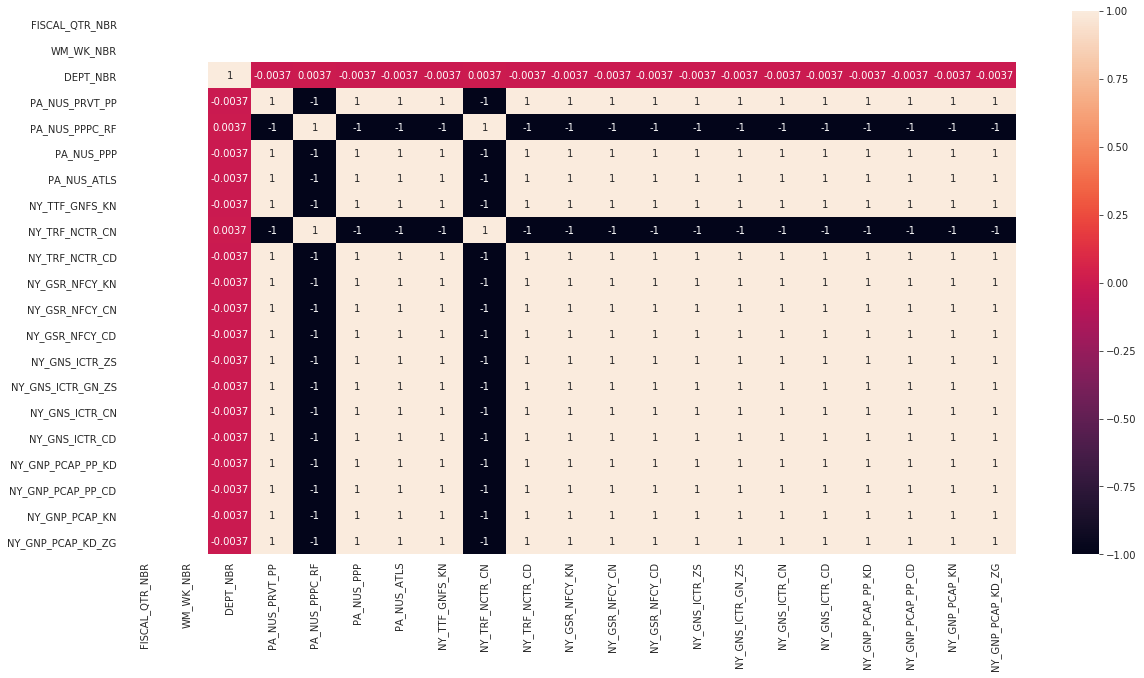

In [0]:
plt.figure(figsize=(20,10))
sns.heatmap(pdf.corr(), annot=True)

In [0]:
# pdf.replace([np.inf, -np.inf], np.nan, inplace=True)
pdf.fillna(0, inplace=True)
pdf

,FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,DEPT_NBR,AMT,PA_NUS_PRVT_PP,PA_NUS_PPPC_RF,PA_NUS_PPP,PA_NUS_ATLS,NY_TTF_GNFS_KN,NY_TRF_NCTR_CN,NY_TRF_NCTR_CD,NY_GSR_NFCY_KN,NY_GSR_NFCY_CN,NY_GSR_NFCY_CD,NY_GNS_ICTR_ZS,NY_GNS_ICTR_GN_ZS,NY_GNS_ICTR_CN,NY_GNS_ICTR_CD,NY_GNP_PCAP_PP_KD,NY_GNP_PCAP_PP_CD,NY_GNP_PCAP_KN,NY_GNP_PCAP_KD_ZG
0,2021,3,08,35,94.0,4802642.110000000,1.324392,0.999353,1.253066,1.253877,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.931427,23.106398,5.724070e+11,4.565100e+11,48857.08510,51690.00000,57781.24080,8.570761
1,2021,3,08,35,83.0,72167.500000000,1.324392,0.999353,1.253066,1.253877,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.931427,23.106398,5.724070e+11,4.565100e+11,48857.08510,51690.00000,57781.24080,8.570761
2,2021,3,08,35,49.0,2774999.510000000,1.324392,0.999353,1.253066,1.253877,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.931427,23.106398,5.724070e+11,4.565100e+11,48857.08510,51690.00000,57781.24080,8.570761
3,2021,3,08,35,46.0,286365.760000000,1.324392,0.999353,1.253066,1.253877,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.931427,23.106398,5.724070e+11,4.565100e+11,48857.08510,51690.00000,57781.24080,8.570761
4,2021,3,08,35,45.0,1470391.760000000,1.324392,0.999353,1.253066,1.253877,79877507291,-3945000000,-3146241863,-16861992000,-18902000000,-15074845041,22.931427,23.106398,5.724070e+11,4.565100e+11,48857.08510,51690.00000,57781.24080,8.570761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2022,3,08,35,12.0,14523710.710000000,1.306971,1.050529,1.231687,1.189465,29903053136,-3682916667,-3160968820,-29570733417,-29481166667,-25352628564,20.405701,20.710029,4.183100e+11,3.539060e+11,46829.50117,45291.66667,55383.30169,1.110969
174,2022,3,08,35,15.0,14523710.710000000,1.306971,1.050529,1.231687,1.189465,29903053136,-3682916667,-3160968820,-29570733417,-29481166667,-25352628564,20.405701,20.710029,4.183100e+11,3.539060e+11,46829.50117,45291.66667,55383.30169,1.110969
175,2022,3,08,35,57.0,14523710.710000000,1.306971,1.050529,1.231687,1.189465,29903053136,-3682916667,-3160968820,-29570733417,-29481166667,-25352628564,20.405701,20.710029,4.183100e+11,3.539060e+11,46829.50117,45291.66667,55383.30169,1.110969
176,2022,3,08,35,74.0,14523710.710000000,1.306971,1.050529,1.231687,1.189465,29903053136,-3682916667,-3160968820,-29570733417,-29481166667,-25352628564,20.405701,20.710029,4.183100e+11,3.539060e+11,46829.50117,45291.66667,55383.30169,1.110969


In [0]:
# X=pdf[['FISCAL_QTR_NBR','FISCAL_PERIOD_NBR','WM_WK_NBR','REGION_NBR','STORE_NBR','DEPT_NBR','NY_GDP_DEFL_KD_ZG','NY_GDP_MKTP_KD_ZG','NY_ADJ_NNTY_PC_CD','NY_GNP_PCAP_PP_CD','NY_GNP_MKTP_PP_CD','NY_ADJ_ICTR_GN_ZS']]
# y=pdf['AMT']

# CANADA
X=pdf[['FISCAL_YR_NBR','FISCAL_QTR_NBR','FISCAL_PERIOD_NBR','WM_WK_NBR','DEPT_NBR','PA_NUS_PRVT_PP','PA_NUS_PPPC_RF','PA_NUS_PPP','PA_NUS_ATLS','NY_TTF_GNFS_KN','NY_TRF_NCTR_CN','NY_TRF_NCTR_CD','NY_GSR_NFCY_KN','NY_GSR_NFCY_CN','NY_GSR_NFCY_CD','NY_GNS_ICTR_ZS','NY_GNS_ICTR_GN_ZS','NY_GNS_ICTR_CN','NY_GNS_ICTR_CD','NY_GNP_PCAP_PP_KD','NY_GNP_PCAP_PP_CD','NY_GNP_PCAP_KN','NY_GNP_PCAP_KD_ZG']]
y=pdf['AMT']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=12345)

In [0]:
def correlation(dt,th):
  col_corr = set()
  corr_mtrx = pdf.corr()
  for i in range(len(corr_mtrx.columns)):
    for j in range(i):
      if abs(corr_mtrx.iloc[i,j]) > th:
        colnm = corr_mtrx.columns[i]
        col_corr.add(colnm)
  return col_corr  
corr_features = correlation(pdf,0.8)
corr_features

Out[1099]: {'NY_GNP_PCAP_KD_ZG',
 'NY_GNP_PCAP_KN',
 'NY_GNP_PCAP_PP_CD',
 'NY_GNP_PCAP_PP_KD',
 'NY_GNS_ICTR_CD',
 'NY_GNS_ICTR_CN',
 'NY_GNS_ICTR_GN_ZS',
 'NY_GNS_ICTR_ZS',
 'NY_GSR_NFCY_CD',
 'NY_GSR_NFCY_CN',
 'NY_GSR_NFCY_KN',
 'NY_TRF_NCTR_CD',
 'NY_TRF_NCTR_CN',
 'NY_TTF_GNFS_KN',
 'PA_NUS_ATLS',
 'PA_NUS_PPP',
 'PA_NUS_PPPC_RF'}

In [0]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    return np.abs(pred.mean())

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [0]:
print("**** Linear Regression Model****")
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

print(lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df1 = pd.Series(lin_reg.coef_, X.columns).sort_values()
coeff_df.plot(kind='bar', title ='Model Coefficients')
print(coeff_df)
pred = lin_reg.predict(X_test)
# # plt.scatter(y_test, pred)

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,9.184672e+06,1.302993e+14,1.141487e+07,-2.315754,9.366977e+14


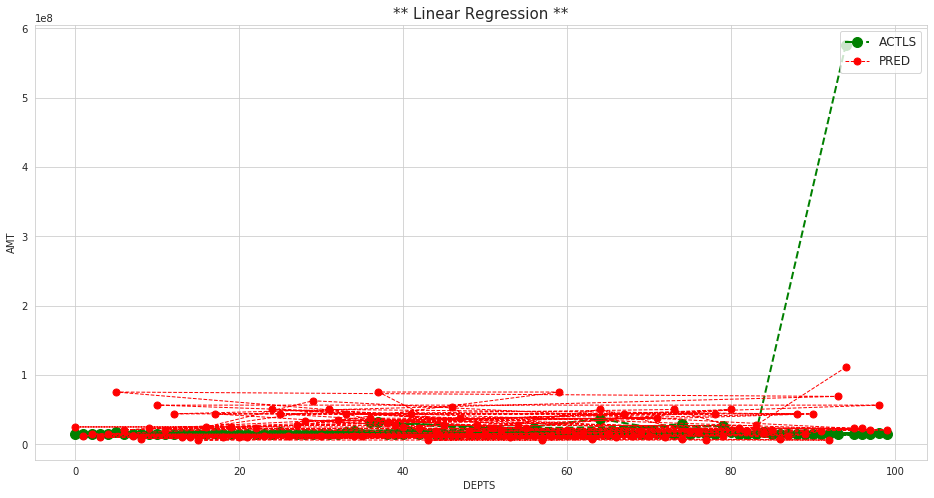

In [0]:
pred1 = lin_reg.predict(X)
print(pdf.shape,X.shape,pred1.shape,pred.shape)
pdf['PRED_AMT'] = pred1
# pdf
xx = pdf['DEPT_NBR'].unique()
yy = pdf.groupby("DEPT_NBR")["AMT"].sum()
yy1 = pdf.groupby("DEPT_NBR")["PRED_AMT"].sum()
plt.figure(figsize=(16,8))

plt.plot(xx,yy,'o--',color='green',lw=2,ms=10,label='ACTLS')
plt.plot(xx,yy1,'o--',color='red',lw=1,ms=7,label='PRED')

# x2= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# y2 = np.sin(x2)
# plt.figure(figsize=(8,4))
# plt.plot(x,y,'o--',color='green',lw=1,ms=5,label='SUBBU')
# plt.plot(x,y2, '-', color='red',lw=1,ms=10,label='REDDY')
plt.xlabel("DEPTS ")
plt.ylabel("AMT")
plt.legend(loc='upper right',fontsize=12)
plt.title("** Linear Regression **",fontsize=15)

In [0]:
# print("**** Robust Regression Model****Random Sample Consensus - RANSAC****")
# from sklearn.linear_model import RANSACRegressor

# model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
# model.fit(X_train, y_train)

# test_pred = model.predict(X_test)
# train_pred = model.predict(X_train)

# print('Test set evaluation:\n_____________________________________')
# print_evaluate(y_test, test_pred)
# print('====================================')
# print('Train set evaluation:\n_____________________________________')
# print_evaluate(y_train, train_pred)

# results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
#                             columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
# results_df = results_df.append(results_df_2, ignore_index=True)
# results_df_2

In [0]:
print("**** Ridge Regression Model****L2")
from sklearn.linear_model import Ridge

l2 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
l2.fit(X_train, y_train)
pred = l2.predict(X_test)

test_pred = l2.predict(X_test)
train_pred = l2.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Ridge Regression,8.910054e+06,1.144936e+14,1.070017e+07,-1.913543,9.387079e+14


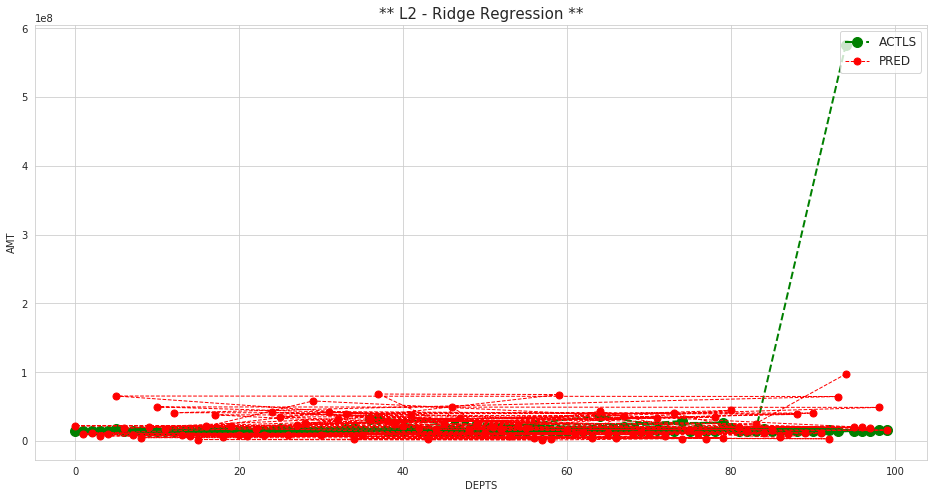

In [0]:
pdf.drop("PRED_AMT", axis=1,inplace=True)
#pdf
pred1 = l2.predict(X)
print(pdf.shape,X.shape,pred1.shape,pred.shape)
pdf['PRED_AMT'] = pred1
xx = pdf['DEPT_NBR'].unique()
yy = pdf.groupby("DEPT_NBR")["AMT"].sum()
# yy = pdf.groupby("DEPT_NBR")["CAN_AMT"].sum()
yy1 = pdf.groupby("DEPT_NBR")["PRED_AMT"].sum()
plt.figure(figsize=(16,8))

plt.plot(xx,yy,'o--',color='green',lw=2,ms=10,label='ACTLS')
plt.plot(xx,yy1,'o--',color='red',lw=1,ms=7,label='PRED')
plt.xlabel("DEPTS")
plt.ylabel("AMT")
plt.legend(loc='upper right',fontsize=12)
plt.title("** L2 - Ridge Regression **",fontsize=15)

In [0]:
print("**** Lasso Regression Model**** L1")
from sklearn.linear_model import Lasso

l1 = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
l1.fit(X_train, y_train)

test_pred = l1.predict(X_test)
train_pred = l1.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2
# plt.plot(test_pred,y_test,)

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Lasso Regression,4.652327e+06,4.960505e+13,7.043085e+06,-0.26231,9.387082e+14


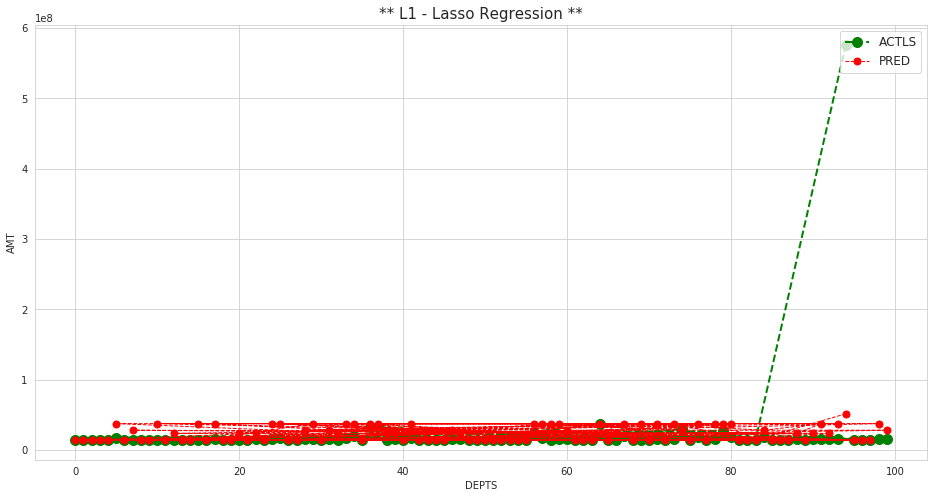

In [0]:
pdf.drop("PRED_AMT", axis=1,inplace=True)
#pdf
pred1 = l1.predict(X)
print(pdf.shape,X.shape,pred1.shape,pred.shape)
pdf['PRED_AMT'] = pred1
xx = pdf['DEPT_NBR'].unique()
yy = pdf.groupby("DEPT_NBR")["AMT"].sum()
# yy = pdf.groupby("DEPT_NBR")["CAN_AMT"].sum()
yy1 = pdf.groupby("DEPT_NBR")["PRED_AMT"].sum()
plt.figure(figsize=(16,8))

plt.plot(xx,yy,'o--',color='green',lw=2,ms=10,label='ACTLS')
plt.plot(xx,yy1,'o--',color='red',lw=1,ms=7,label='PRED')
plt.xlabel("DEPTS")
plt.ylabel("AMT")
plt.legend(loc='upper right',fontsize=12)
plt.title("** L1 - Lasso Regression **",fontsize=15)

In [0]:
print("**** Support Vector Machine ****")
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,SVM Regressor,4.367217e+06,5.193729e+13,7.206753e+06,-0.321659,0


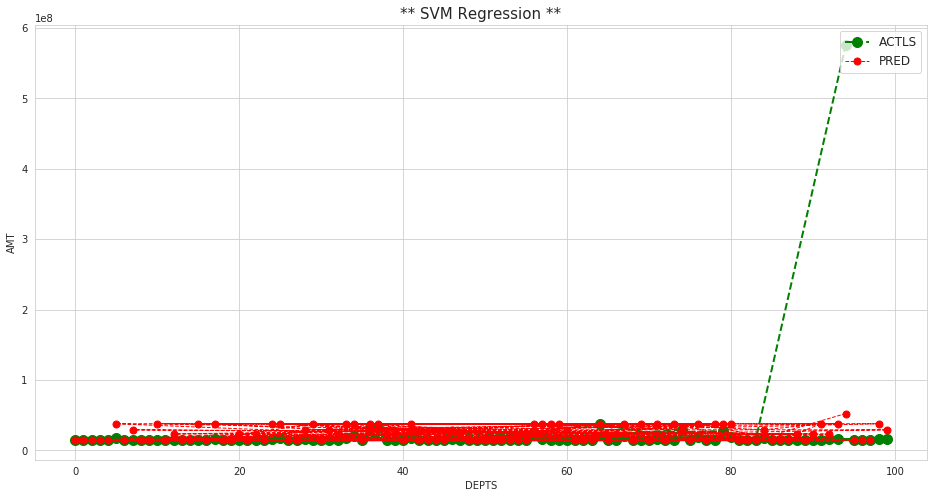

In [0]:
pdf.drop("PRED_AMT", axis=1,inplace=True)
#pdf
pred1 = svm_reg.predict(X)
print(pdf.shape,X.shape,pred1.shape,pred.shape)
pdf['PRED_AMT'] = pred1
xx = pdf['DEPT_NBR'].unique()
yy = pdf.groupby("DEPT_NBR")["AMT"].sum()
# yy = pdf.groupby("DEPT_NBR")["CAN_AMT"].sum()
yy1 = pdf.groupby("DEPT_NBR")["PRED_AMT"].sum()
plt.figure(figsize=(16,8))

plt.plot(xx,yy,'o--',color='green',lw=2,ms=10,label='ACTLS')
plt.plot(xx,yy1,'o--',color='red',lw=1,ms=7,label='PRED')
plt.xlabel("DEPTS")
plt.ylabel("AMT")
plt.legend(loc='upper right',fontsize=12)
plt.title("** SVM Regression **",fontsize=15)

In [0]:
# print("**** Polynomial Regression Model****")

# from sklearn.preprocessing import PolynomialFeatures

# poly_reg = PolynomialFeatures(degree=2)

# X_train_2_d = poly_reg.fit_transform(X_train)
# X_test_2_d = poly_reg.transform(X_test)

# lin_reg = LinearRegression(normalize=True)
# lin_reg.fit(X_train_2_d,y_train)

# test_pred = lin_reg.predict(X_test_2_d)
# train_pred = lin_reg.predict(X_train_2_d)

# print('Test set evaluation:\n_____________________________________')
# print_evaluate(y_test, test_pred)
# print('====================================')
# print('Train set evaluation:\n_____________________________________')
# print_evaluate(y_train, train_pred)

# results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
#                             columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
# results_df = results_df.append(results_df_2, ignore_index=True)
# results_df_2

In [0]:
print("**** Stochastic Gradient Descent Regression Model****")
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Stochastic Gradient Descent,1.630728e+30,2.686115e+60,1.638937e+30,-6.835415e+46,0


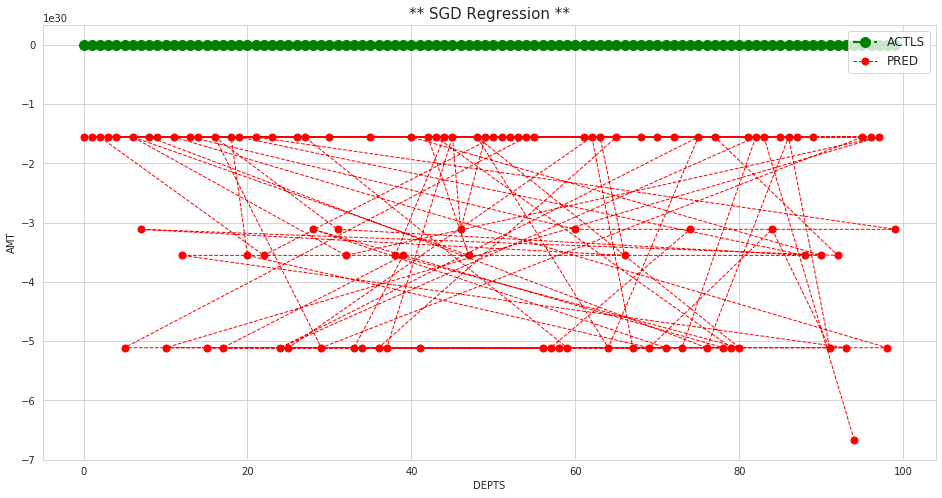

In [0]:
pdf.drop("PRED_AMT", axis=1,inplace=True)
#pdf
pred1 = sgd_reg.predict(X)
print(pdf.shape,X.shape,pred1.shape,pred.shape)
pdf['PRED_AMT'] = pred1
xx = pdf['DEPT_NBR'].unique()
yy = pdf.groupby("DEPT_NBR")["AMT"].sum()
# yy = pdf.groupby("DEPT_NBR")["CAN_AMT"].sum()
yy1 = pdf.groupby("DEPT_NBR")["PRED_AMT"].sum()
plt.figure(figsize=(16,8))

plt.plot(xx,yy,'o--',color='green',lw=2,ms=10,label='ACTLS')
plt.plot(xx,yy1,'o--',color='red',lw=1,ms=7,label='PRED')
plt.xlabel("DEPTS")
plt.ylabel("AMT")
plt.legend(loc='upper right',fontsize=12)
plt.title("** SGD Regression **",fontsize=15)

In [0]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
test_pred = dt_reg.predict(X_test)
results_df_2 = pd.DataFrame(data=[["DT Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,DT Regressor,1.049763e+07,7.185852e+14,2.680644e+07,-17.285993,0


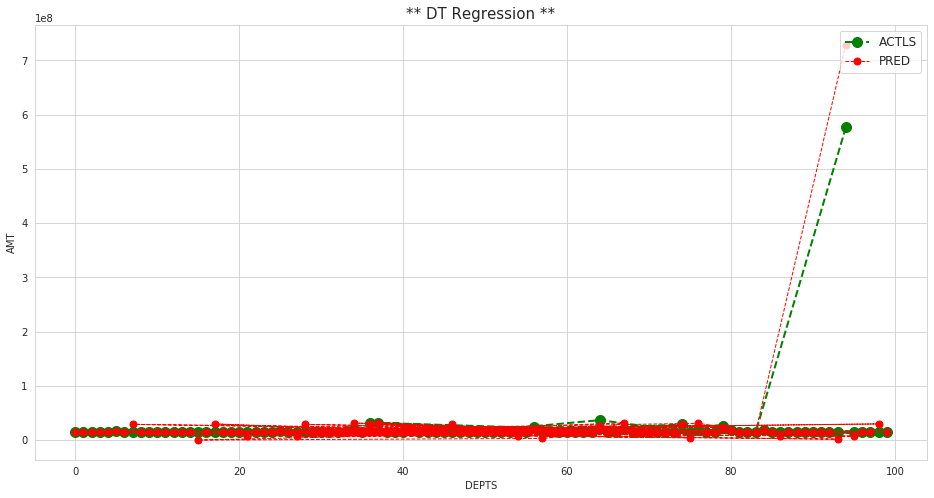

In [0]:
pdf.drop("PRED_AMT", axis=1,inplace=True)
#pdf
pred1 = dt_reg.predict(X)
print(pdf.shape,X.shape,pred1.shape,pred.shape)
pdf['PRED_AMT'] = pred1
xx = pdf['DEPT_NBR'].unique()
yy = pdf.groupby("DEPT_NBR")["AMT"].sum()
# yy = pdf.groupby("DEPT_NBR")["CAN_AMT"].sum()
yy1 = pdf.groupby("DEPT_NBR")["PRED_AMT"].sum()
plt.figure(figsize=(16,8))

plt.plot(xx,yy,'o--',color='green',lw=2,ms=10,label='ACTLS')
plt.plot(xx,yy1,'o--',color='red',lw=1,ms=7,label='PRED')
plt.xlabel("DEPTS")
plt.ylabel("AMT")
plt.legend(loc='upper right',fontsize=12)
plt.title("** DT Regression **",fontsize=15)

In [0]:
print("**** Random Forest Regressor ****")
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)
# print('Test set evaluation:\n_____________________________________')
# print_evaluate(y_test, test_pred)
# print('Train set evaluation:\n_____________________________________')
# print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["RF Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,RF Regressor,1.007017e+07,6.915370e+14,2.629709e+07,-16.597691,0


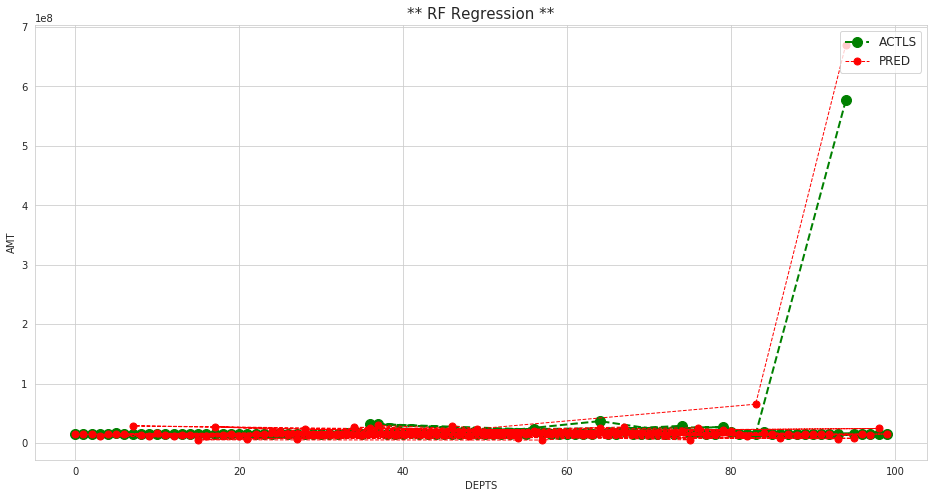

In [0]:
pdf.drop("PRED_AMT", axis=1,inplace=True)
#pdf
pred1 = rf_reg.predict(X)
print(pdf.shape,X.shape,pred1.shape,pred.shape)
pdf['PRED_AMT'] = pred1
xx = pdf['DEPT_NBR'].unique()
yy = pdf.groupby("DEPT_NBR")["AMT"].sum()
# yy = pdf.groupby("DEPT_NBR")["CAN_AMT"].sum()
yy1 = pdf.groupby("DEPT_NBR")["PRED_AMT"].sum()
plt.figure(figsize=(16,8))

plt.plot(xx,yy,'o--',color='green',lw=2,ms=10,label='ACTLS')
plt.plot(xx,yy1,'o--',color='red',lw=1,ms=7,label='PRED')
plt.xlabel("DEPTS")
plt.ylabel("AMT")
plt.legend(loc='upper right',fontsize=12)
plt.title("** RF Regression **",fontsize=15)

In [0]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,9.184672e+06,1.302993e+14,1.141487e+07,-2.315754e+00,9.366977e+14
1,Ridge Regression,8.910054e+06,1.144936e+14,1.070017e+07,-1.913543e+00,9.387079e+14
2,Lasso Regression,4.652327e+06,4.960505e+13,7.043085e+06,-2.623102e-01,9.387082e+14
3,SVM Regressor,4.367217e+06,5.193729e+13,7.206753e+06,-3.216595e-01,0.000000e+00
4,Stochastic Gradient Descent,1.630728e+30,2.686115e+60,1.638937e+30,-6.835415e+46,0.000000e+00
5,DT Regressor,1.049763e+07,7.185852e+14,2.680644e+07,-1.728599e+01,0.000000e+00
6,RF Regressor,1.007017e+07,6.915370e+14,2.629709e+07,-1.659769e+01,0.000000e+00


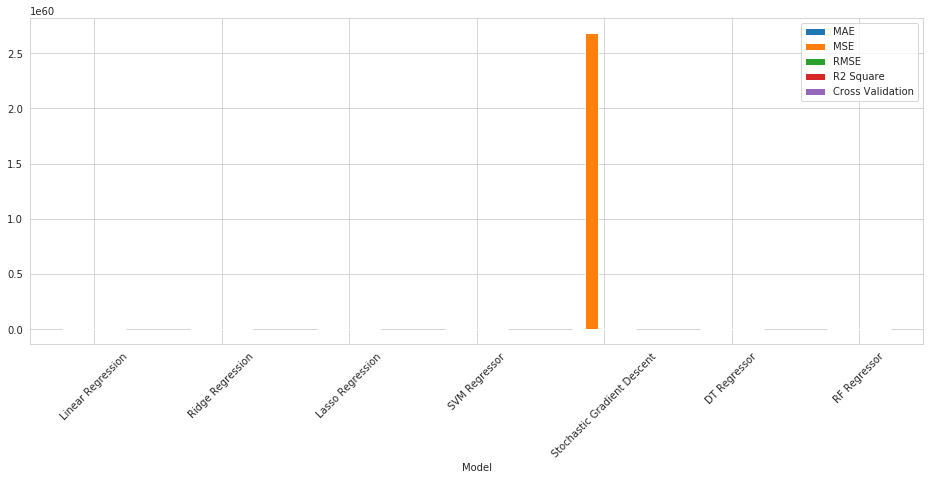

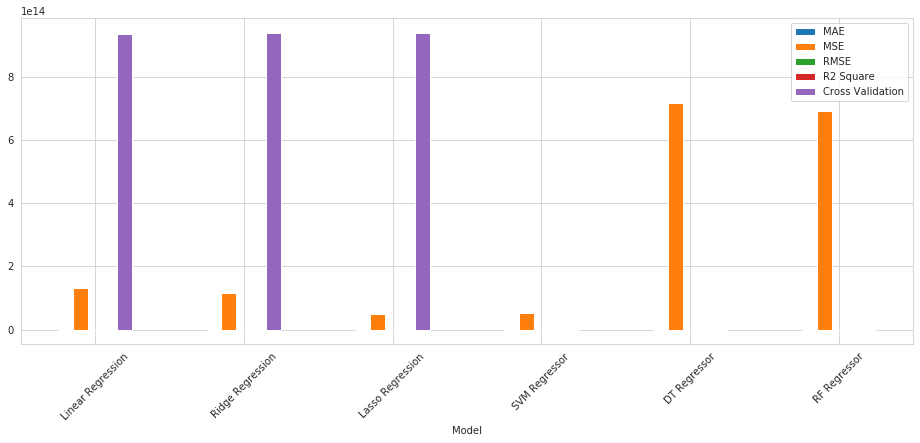

In [0]:
results_df.plot.bar(x='Model', rot=45, figsize=(16, 6))
results_df=results_df.drop(index=4)
results_df.plot.bar(x='Model', rot=45, figsize=(16, 6))


In [0]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,test_pred.shape,pred.shape,train_pred.shape)
# results_df

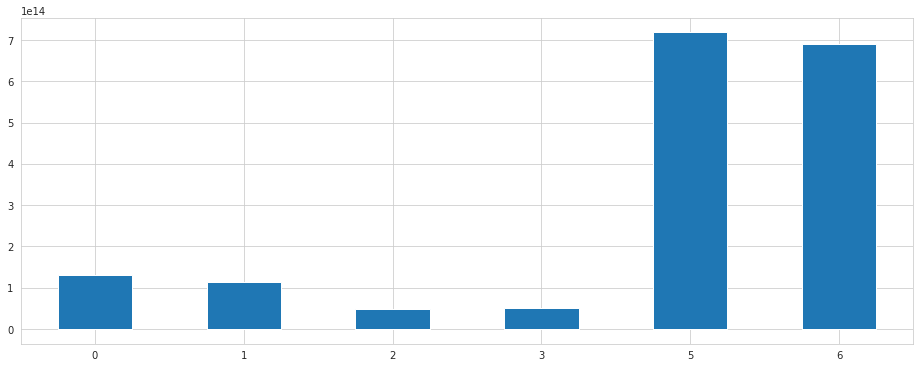

In [0]:
results_df['MAE'].plot.bar(x='Model', rot=0,figsize=(16, 6))
results_df['MSE'].plot.bar(x='Model', rot=0,figsize=(16, 6))
results_df['RMSE'].plot.bar(x='Model', rot=0,figsize=(16, 6))
results_df['R2 Square'].plot.bar(x='Model', rot=0,figsize=(16, 6))
# results_df.plot.box()

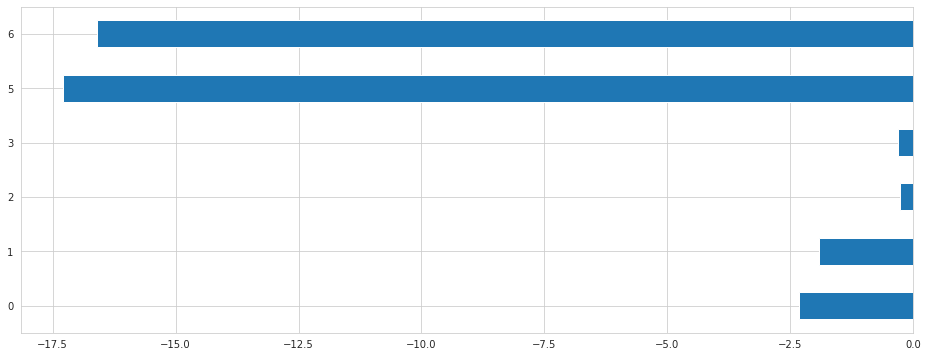

In [0]:
print("**** Models Comparison ****")
# results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(16, 6))

#ax = sns.plot(x="R2 Square", hue="Model", data=results_df, size=50, aspect = 8)
ax = sns.plot(x="R2 Square", hue="Model", data=results_df, size=20, aspect = 10,xlabel='R2 SQR',ylabel='Model', title='R2')
ax.set_xticklabels(rotation=30)
plt.show()